<a href="https://colab.research.google.com/github/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/blob/master/Project%202%3A%20Digit%20recognition%20(Part%201)/Multinomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multinomial (Softmax) Regression and Gradient Descent


---



## Setup

Cloning into '/nblib'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 15), reused 7 (delta 2), pack-reused 0
Unpacking objects: 100% (32/32), done.


importing Jupyter notebook from /nblib/Git.ipynb
Cloning into '/content/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 770 (delta 44), reused 0 (delta 0), pack-reused 705
Receiving objects: 100% (770/770), 48.19 MiB | 32.00 MiB/s, done.
Resolving deltas: 100% (386/386), done.
importing Jupyter notebook from /content/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019/setup/Setup.ipynb


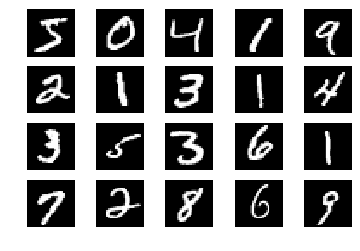

In [1]:
import os, sys
from pathlib import Path

# Notebook Library
url = "https://github.com/Data-Science-and-Data-Analytics-Courses/Notebook-Library"
repo = Path("/nblib")
!git clone "{url}" "{repo}"
if repo.parent.as_posix() not in sys.path:
  sys.path.append(repo.parent.as_posix())
%run "{repo}/.Importable.ipynb"

from nblib import Git
# Remote
URL = "https://github.com/Data-Science-and-Data-Analytics-Courses/MITx---Machine-Learning-with-Python-From-Linear-Models-to-Deep-Learning-Jun-11-2019"
REPO = Git.clone(URL, dest="/content")
if REPO.as_posix() not in sys.path:
  sys.path.append(REPO.as_posix())

# Working directory, for running modules in part1
part1dir = REPO / "Project 2: Digit recognition (Part 1)/mnist/part1"
os.chdir(part1dir)

from setup.Setup import *
import main

## Test Error on Softmax Regression



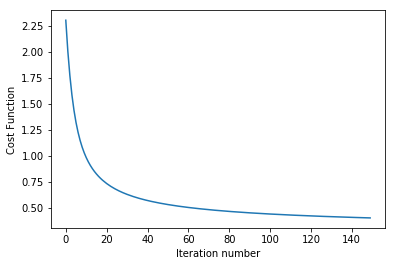

0.10050000000000003

In [2]:
main.run_softmax_on_MNIST(temp_parameter=1)